In [45]:
%matplotlib inline
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# provider = IBMQ.load_account()

In [46]:
# additional imports
import numpy as np

# Gęste kodowanie

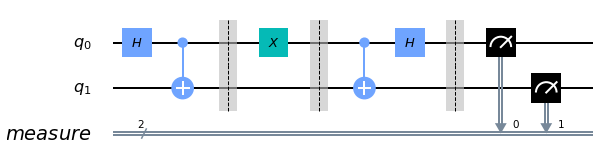

In [47]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)
qc.barrier()

msg = "10"
if msg == "00":
    pass
elif msg == "10":
    qc.x(0)
elif msg == "01":
    qc.z(0)
elif msg == "11":
    qc.z(0)
    qc.x(0)
qc.barrier()

qc.cx(0,1)
qc.h(0)

qc.measure_all()
qc.draw()

{'10': 1000}


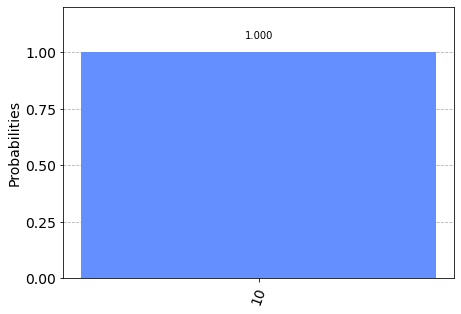

In [48]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

W przykładzie wyżej widać, że zawsze otrzymaliśmy tą samą wiadomość, która była zakodowana na początku (można zmienić `msg` i potwierdzić).  
Pomiar w bazie Bella jest wykonywany po 2 barierze, poprzez zastosowanie najpierw bramki `cnot` i następnie bramki `H`.  
Przesłanie informacji kwantowej odbywa się w miejscu 2 bariery - po zakodowaniu wiadomości, a przed dokonaniem pomiaru w bazie Bella.  
Przesyłanie informacji klasycznej w protokole gęstego kodowania nie występuje.

# Teleportacja kwantowa

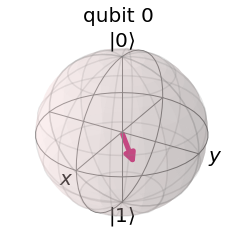

In [33]:
# Preparing Psi state
from qiskit_textbook.tools import random_state, vector2latex
psi = random_state(1)
from qiskit.extensions import Initialize
init_gate = Initialize(psi)
plot_bloch_multivector(psi)

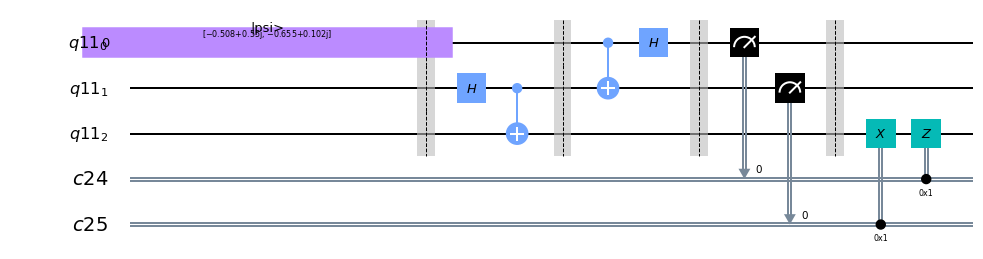

In [34]:
qreg1 = QuantumRegister(3)
reg1 = ClassicalRegister(1)
reg2 = ClassicalRegister(1)
qc = QuantumCircuit(qreg1, reg1, reg2)
qc.append(init_gate, [0])
qc.barrier()
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure(0, 0)
qc.measure(1, 1)
qc.barrier()
qc.x(2).c_if(reg2, 1)
qc.z(2).c_if(reg1, 1)
qc.draw()

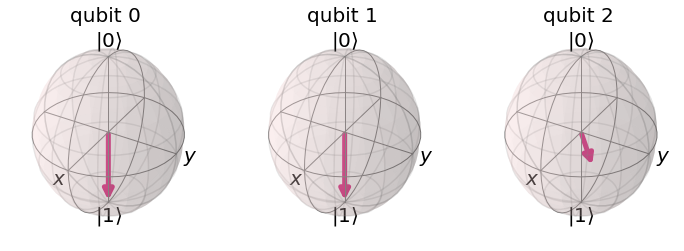

In [35]:
backend = Aer.get_backend('statevector_simulator')
out_vector = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out_vector)


Jak widać na wizualizacjach powyżej, wektor `psi` i `qubit 2` są identyczne.  
Pomiar w bazie Bella odbywa się między 2 i 4 barierą, poprzez operacje `cnot` i `H` (oraz oczywiście pomiary).  
Przesyłanie informacji kwantowej nie występuje w teleportacji kwantowej.  
Przesłanie informacji klasycznej występuje "na" 4 barierze, po pomiarze w bazie Bella i następnie w zależności od tej informacji są aktywowane odpowiednie bramki.